In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0,10.0)
data=pd.read_csv("kc_house_data.csv")
print(data.shape)
data.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
X=data['sqft_living'].values
Y=data['price'].values

In [3]:
mean_x = np.mean(X)#finding mean of x
mean_y = np.mean(Y)#finding mean of y
n = len(X)
num=0
den=0
for i in range(n):
    num+=(X[i]-mean_x)*(Y[i]-mean_y)
    den+=(X[i]-mean_x)**2
b1 = num/den#coefficient slope
b0 = mean_y - (b1*mean_x)#coefficient c y-intercept
print(b1,b0)

280.6235678974486 -43580.743094474776


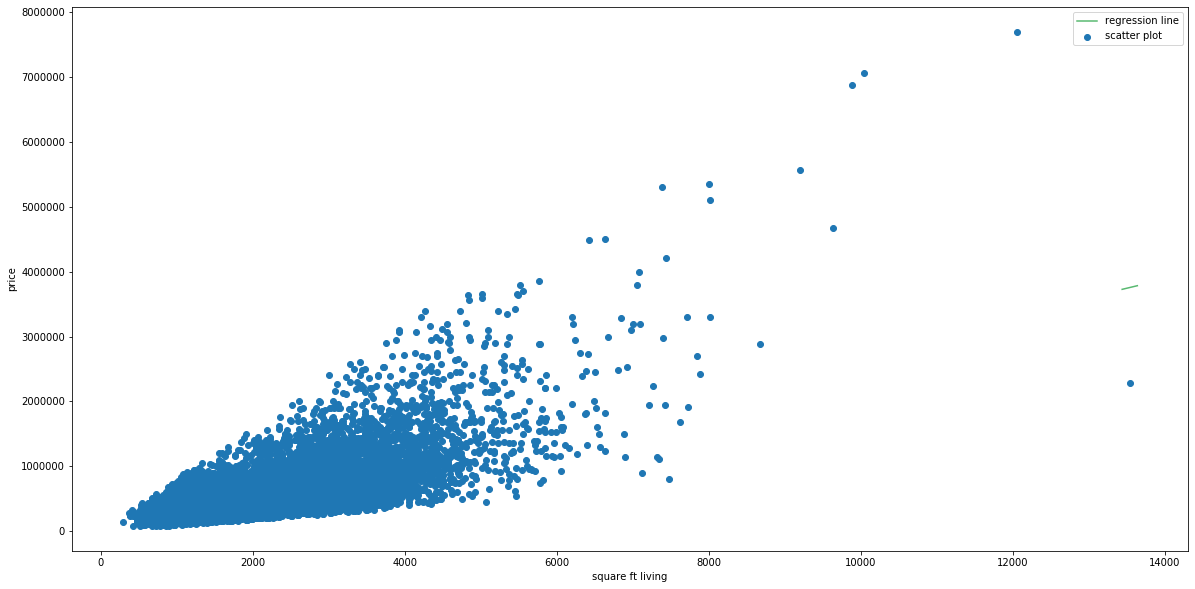

In [4]:
#plotting
max_x = np.max(X)+100
min_x = np.max(X)-100
x = np.linspace(min_x,max_x,1000)
y = b0 + b1*x
plt.plot(x,y,color='#58b970',label='regression line')
plt.scatter(X,Y,label='scatter plot')
plt.xlabel('square ft living')
plt.ylabel('price')
plt.legend()
plt.show()

In [5]:
ss_t=0
ss_r=0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i]-mean_y)**2
    ss_r += (Y[i] - y_pred)**2
r2 = 1-(ss_r/ss_t)
print(r2)

0.4928532179037912


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = X.reshape((n,1))
reg = LinearRegression()
reg = reg.fit(X,Y)
y_pred = reg.predict(X)
r2_score = reg.score(X,Y)
print(r2_score)

0.49285321790379316
